# Predicting Whether A Member will Attend A Fitness Class or not

### Background:
GoalZone is a fitness club chain in Canada.
GoalZone offers a range of fitness classes in two capacities - 25 and 15.
Some classes are always fully booked. Fully booked classes often have a low attendance rate.
GoalZone wants to increase the number of spaces available for classes.
They want to do this by predicting whether the member will attend the class or not.
If they can predict a member will not attend the class, they can make another space
available.



In [1]:
# importing libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset

fitness_df = pd.read_csv(r"C:\Users\Martosoft\Desktop\DataSet\Fitness\fitness_class_2212.csv")

In [4]:
# General overview of the dataset

fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [5]:
# running a quick descriptive check 

fitness_df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [6]:
# checking for missing data

fitness_df.isna().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [7]:
# obtaining the mean weight 

mean_weight= np.mean(fitness_df["weight"].dropna())
mean_weight

82.61037837837839

In [8]:
# cleaning the "weight" column by replacing the missing value with the average mean weight

fitness_df["weight"] = fitness_df["weight"].fillna(mean_weight)

fitness_df["weight"].dtypes

dtype('float64')

In [9]:
# cleaning the "category" column
fitness_df["category"] = fitness_df["category"].str.replace("-", "unknown")

# converting the data type to "category"
fitness_df["category"] = fitness_df["category"].astype("category")

In [10]:
# checking for missing value again to validate our cleaning

fitness_df.isna().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [11]:
# cleaning the "day_of_week" column

fitness_df["day_of_week"] = fitness_df["day_of_week"].str.strip()
fitness_df["day_of_week"] = fitness_df["day_of_week"].str.strip(".")
fitness_df["day_of_week"] = fitness_df["day_of_week"].str.replace("Monday", "Mon")
fitness_df["day_of_week"] = fitness_df["day_of_week"].str.replace("Wednesday", "Wed")
fitness_df["day_of_week"] = fitness_df["day_of_week"].astype("category")

name = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat","Sun"]
fitness_df["day_of_week"] = fitness_df["day_of_week"].cat.reorder_categories(name, ordered= True)

In [12]:
# cleaning the "attended" column

fitness_df["attended"] = fitness_df["attended"].astype("category")
fitness_df["attended"] = fitness_df["attended"].cat.reorder_categories([0, 1], ordered= False)

In [13]:
# cleaning the "time" column

fitness_df["time"] = fitness_df["time"].astype("category")
name = ["AM", "PM"]
fitness_df["time"] = fitness_df["time"].cat.reorder_categories(name, ordered= True)

In [14]:
# cleaning the "days_before" column

fitness_df["days_before"] = fitness_df["days_before"].str.strip()
fitness_df["days_before"] = fitness_df["days_before"].str.strip("days")

fitness_df["days_before"] = fitness_df["days_before"].astype("int")

In [15]:
# running a quick check on the dataset again to verify if the data is cleaned and set in the right data-type

fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   int64   
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int32   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(4), float64(1), int32(1), int64(2)
memory usage: 47.8 KB



The dataset contains **1500** rows and **8** columns with missing values presented in the “weight” column only before cleaning. I have validated all the columns against the criteria in the dataset table:
- Booking_id: Same as description without missing values.
- 	Months_as_member: Same as description without missing values.
- 	weight: it contains 20 missing values, so I replaced the missing values with the average mean weight using the filna method  and passing the calculated average mean weight into the it.
- 	Days_before: Same as description without missing values. I stripped "days" from the values in the column and then convert it itno integer data-type.
- 	Day_of_week: Same as description without missing values. i stripped the empty spaces, and rename some of the categories and then convert the column to categorical data-type. I also reordered the category from Mon-Sun.
- 	time: Same as description without missing values.
- 	category: Same as description without missing values; but one of the categories was presented as “-”, so I replaced it with "unknown" using the str.replace method; and then converted the column to categorical data-type.
- 	attended: Same as description without missing values. i converted data-type to category with no respective order.
After the data validation, the dataset contains 1500 rows and 8 columns with no missing data and each column is set to the correct data-types.

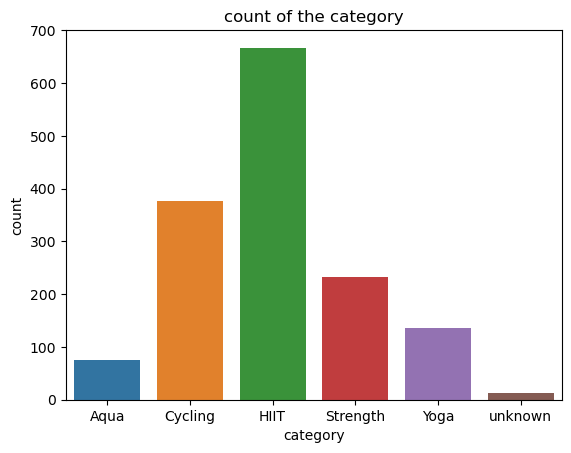

In [16]:
# Creating a visualization that shows the number bookings per class. 

sns.countplot(data= fitness_df, x= "category")
plt.title("count of the category")
plt.show()


From count plot above, the “HIIT” category have the highest number of attendances about 667 attendees, then follows by “Cycling” category with 376 attendees,and “Strength” category with 233 attendees, and so on. Hence, the observations are imbalance across categories.


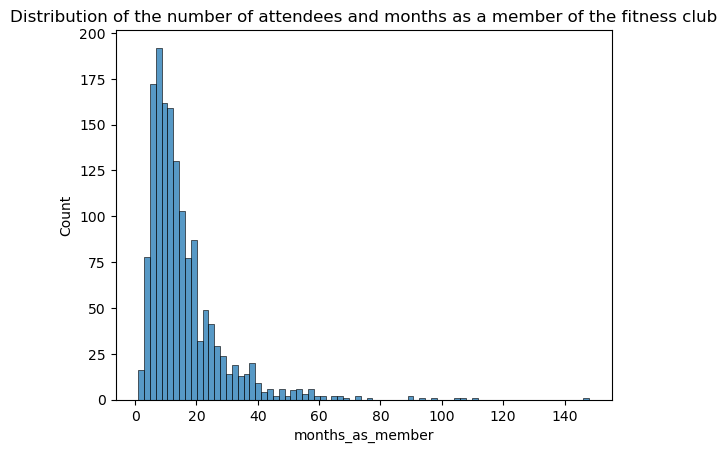

In [18]:
# The distribution of the number of months a member have spent from the day of registration till the last recorded date

sns.histplot(data= fitness_df, x = "months_as_member")
plt.title("Distribution of the number of attendees and months as a member of the fitness club")
plt.show()

From the histogram above, we can see that the distribution is right-skewed. Hence, the distribution of the number of months as a member follows an exponential distribution.

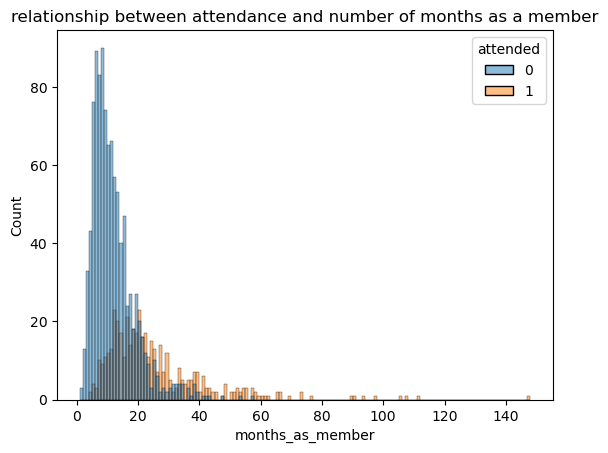

In [19]:
sns.histplot(data= fitness_df, x= "months_as_member", hue= "attended", binwidth= 1)
plt.title("relationship between attendance and number of months as a member")
plt.show()

From the histogram above, the binwidth is equal to one month of membership of the fitness class club. From the histogram, the registered members for the fitness class who have been in the club for less than three months was 49 but did not attend the fitness class. The first category of persons that attended the class was those that have been a member of the club for over four months.


Evaluating the overall dataset, we have four categorical columns; and the observation of the attended column is a binary observation. Since we are interested in that column, we can deduce that the problem is a binary classification problem, with 1 for members that attended the fitness class, and 0 for those that did not attend the fitness class. Therefore, the type of machine learning problem is a classification problem under supervised machine learning. Hence, we can make prediction whether member(s) will attend the fitness class or not.

Below, I fitted a k-Nearest Neighbors classifier model to predict whether member(s) will attend the fitness class if given that such member(s) have been a member of the club for X month(s), using 10 neighbors. The fitted KNN model have an accuracy performance rate of 75.56%.

## Developing a predictive model

In [43]:
# Importing the needed modules and models

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# fetching the data from the dataset

X= fitness_df[["months_as_member"].values
y= fitness_df["attended"].values


### Fitting a K-Nearest Neighbors(KNN) model

In [44]:
# instantiating the KNN model
knn = KNN(n_neighbors = 5)

# fitting the model
knn.fit(X, y)

# using a new data to test the model
X_new = np.array([[11],[12],[21],[20]])
X_new.reshape((-1,1))

# using the model to make prediction
y_pred = knn.predict(X_new)

print("Predictions: {}".format(y_pred))

Predictions: [0 0 0 1]


In [46]:
# measuring the model performance

# splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 20, stratify = y)

knn = KNN(n_neighbors = 10)

knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)

print(score)


0.7555555555555555


Here our KNN model have a score of 0.7711 which implies that, it has a 77.1% capability of making correct prediction; and this value is fair enough.

### Checking if Logistic regression model we have a better fit

In [47]:
# import the logistic regression model from linear_model in scikit-learn
from sklearn.linear_model import LogisticRegression

#instantiating the model
logreg = LogisticRegression()

# splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 20)

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

In [48]:
# predicting the probabilities of each instance of attending or not
y_pred_probs = logreg.predict_proba(X_test)[:,1]

print(y_pred_probs[:10])

[0.0961753  0.21881808 0.36664297 0.36664297 0.48433063 0.19884094
 0.10721823 0.14722734 0.54469931 0.10721823]


From the results above, our KNN model predict that, there is approximately 10% probability that the first member examined will attend the fitness class.

### Reasons for choosing the KNN and Logistic regression model:
1. The problem is a binary classification problem.
2. Both model is capable of predicting binary outcomes to a higher accuracy in classification problem.*

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

knn = KNN(n_neighbors = 10)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 20)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
 

[[286  21]
 [ 83  60]]


In [26]:
# classification report for the KNN model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       307
           1       0.74      0.42      0.54       143

    accuracy                           0.77       450
   macro avg       0.76      0.68      0.69       450
weighted avg       0.76      0.77      0.75       450



In [27]:
# the AUC score for the KNN model

print(roc_auc_score(y_test, y_pred))

0.6755882553928156


In [28]:
#instantiating the model
logreg = LogisticRegression()

# splitting data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 20)

logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_logreg))

[[297  10]
 [ 91  52]]


In [29]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.77      0.97      0.85       307
           1       0.84      0.36      0.51       143

    accuracy                           0.78       450
   macro avg       0.80      0.67      0.68       450
weighted avg       0.79      0.78      0.74       450



In [30]:
print(roc_auc_score(y_test, y_pred_probs))

0.8473611079474271


Here, our class of interest is attended i.e. the positive class. Since the aim is to predict whether a member(s) will attend the fitness class. From the confusion matrix above, the KNN model produced 60 true positives and 21 false positives, meaning precision is around 74%. The output shows an F1-score of 0.85 for the zero class, which represents individuals who will not attend the fitness class.

From the confusion matrix for the Logistic regression model, the model produced 52 true positives and 10 false positives, meaning precision was more than 83%. Here, the model scores 0.85, which is 17% better than the KNN model which is making random guesses. This model shows a better precision compare to the KNN model. Though F1-score for the zero class is the same for both the Logistic regression model and the KNN model, which represents individuals who will not attend the fitness class.


Examining the two model, the logistic regression model performs better than the KNN model, since the logistic regression model has an AUC score of 85%, which is 17% better than the KNN model.